# Term Deposit Predictive ML Model

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
    * Field Knowledge
* Data
    * Libraries
    * Importing
    * Features
* Exploratory Data Analysis (EDA)
    * Shape and Size
    * Types
    * Unique Values
    * Missing Values
    * Units Conversion
    * Overview - Continuous and Categorical Data
    * Continuous Variables
        * Summary statistics
        * Making sense of the data
        * Outliers detection and treatment
    * Catagorical Variables 

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository](https://github.com/caiocvelasco/ml-project-bank-term-deposit/blob/4f1bfa72d17cefdfe2a515054f1f2cfffa3c7749/bank-term-deposit-notebook.ipynb).

### Problem Definition

A bank would like to understand the main factors driving customers to subscribe a Term Deposit.

### Objective
Our goal is to build a classifier (supervised machine Learning model) to predict whether customers would subscribe a Term Deposit. In case we find high accuracy in our model, it would imply that the bank marketing department could benefit from an efficient use of available resources by focusing on the "right" customers (given by our _classifier_). Moreover, we want to understand which other factors might also affect customers' decision.

* Recall: Classification Model

    The goal of a classification model is to build a data-driven model that learns an unknown underlying function that maps several input variables, which characterize an item (e.g., bank client, with one labeled output target (e.g., type of bank deposit sell: “failure” or “success”). 
    _[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

### Field Knowledge

Suppose a bank is interested in predicting whether its customers would subscribe a _Bank Term Deposit_. 

**What is a term deposit and why does someone want to invest their money?**

Before answering these questions, let's look into some important definitions and then into some insights from Economic Theory. This will help understand the scenario.

**Financial Instruments**

A financial instrument is an asset that can be traded between entities. An agreement (or contract) will hold both parties accountable for such transaction.
We can divide financial instruments into different classes of financial instruments. An example is the _Debt-Based Financial Instruments_.

**Debt-Based Financial Instruments**

The term _debt_ comes from the fact that some financial institutions want to raise capital by borrowing money from people. When this transaction happens, the financial institution has the obligation to pay back at a later date, with interest. Thus, the financial institution has a _debt_ with the lender.
Such instruments can also be interpreted as a _Certificate of Deposit_, i.e., you _deposit_ money into an account at a financial institution for some period of time in exchange for future compensation.

**Maturity**

Maturity is the period of time it takes for the lender to withdraw this or her money from the bank. Maturity date is the agreed-upon date on which the investment ends.

**Fixed-term Investment**

When a financial instrument has a fixed time period of investment, the maturity is known at the time of issuance and the lender cannot withdraw its money befeore maturity without incurring on a _early withdrawal penalty_. This penalty is important to the bank, because a bank makes money by lending its customers deposits to other entities and profiting on top of that. Banks need to reduce risk in their operations and such penalties account for the unexpected costs created by customers who decide to withdraw their deposits before maturity.  

**Term Deposit**

Term Deposit is an example of a _Fixed-Term, Debt-Based Financial Instrument_, also called a _Certificate of Deposit_.
Moreover, a Term Deposit is a risk-free investment since they are backed by the government.
In sum:
* When a customer subscribes to a **Term Deposit** he or she will deposit (or invest) money into a bank account, agreeing not to withdraw their funds for a fixed period in return for future compensation (interest), i.e., before maturity.

**The Decision Problem faced by an Investor**

An investor is an individual (or entity) who makes certain decisions regarding how he or she spends his or her money.
* How much of my money should I use in consumption (goods or services) now?
* From what is left, how much should I spend on investment opportunities?

Such decisions are unscapable to the individual because resourses are limited. You only have a certain amount of money and you need to make decisions regarding how to spend it.
We say that the investor faces a _trade-off_ between consuming less now to (hopefully) consume more in the future, i.e.:
* Spend less in consumption at the beginning of a period in exchange for an investment opportunity that will hopefully earn profits at the end of the period.

**Economic Incentives behind Consumer Behavior & Investment Opportunities**

An _Economic Incentive_ is something that motivates or drives one to behave in a certain way. The most simple example in Economics is: Prices.\
_Prices_ provide an incentive mechanism that might induce people's behavior in a certain way. For example, if the price of apples go up, you will probably buy less apples (and buy more of some other good or service).

Good things to know:
* In periods of rising interest rates in society (usually started by the Central Bank), consumers are more likely to invest because it is better to lend money to the bank than to spend it on consumption now. Thus, when the interest rate is higher, people tend to invest more, hence changing their status-quo behavior. Thus, future expectations of _higher interest rates_ could help predict consumer behavior towards subscribing to **Term Deposits**.
* **Term deposits** do not keep up with inflation. If the rate on a term deposit is 3% and the inflation rate. is 3.5%, the customer is not earning enough to compensate for price increases in the economy. Thus, _Inflation Rate_ maybe a strong underlying _economic incentive_ that could help predict consumer behavior towards subscribing to **Term Deposits**.

## Data
Data was already available on a _csv_ format. So I'll skip this section.

### Libraries

In [90]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be

import matplotlib.pyplot as plt  # for data visualization
import matplotlib as mpl
import seaborn as sns            # for data visualization

### Importing

* [_Brief Note_]   It is important to import only the data we need to save up time and space. However, this dataset already contains the features we need, so I will skip that.
* [_Importing_]    The csv dataset will be imported as a dataframe using pandas.
* [_Independence_] This notebook can be downloaded and saved anywhere in your computer (one needs only to change the name of the folder where the CVS files are located).
* [_Automation_]   Any dataset saved in the designated folder will be stored automatically.
* [Stacking]       If there is a need to combine (or stack) multiple CSV files, please read the _extra_ below.

Extra - Multiple CSV files
* If there is a need to stack (or combine) multiple CSV files based on a matching _filename_ pattern, please check one of my [repositories](https://github.com/caiocvelasco/stack-combine-multiple-csv-files/blob/7854a473046e4dc5876bcf8caa69b4b3d16dc7e1/stack-combine-multiple-csv-files.ipynb). There, you'll find a code to perform this task automatically under the following assumption: the stored CSV files have the same features (aka same columns).

In [91]:
# Basic Settings
csv_folder_name = "bank_marketing"  # please, change the folder name where the CSV files are stored **if need be**
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save cvs data on a pandas dataframe
df = pd.read_csv("bank-full-case.csv", sep = ";", skipinitialspace = True) #skip space after delimiter

# Save a copy of the dataframe
data = df.copy()

# Basic Formatting
data.name = "Bank Term Deposit Dataset" # rename the dataset 
cols = data.columns;                    # create an index list with features names

# Quick overview of a sample from the data
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17130,39,technician,married,secondary,no,10685,yes,no,cellular,25,jul,1369,9,-1,0,unknown,yes
22849,40,management,married,tertiary,no,24450,no,no,cellular,25,aug,73,2,-1,0,unknown,no
31416,58,management,married,tertiary,no,1384,yes,no,cellular,27,mar,342,1,-1,0,unknown,yes
29379,37,admin.,married,secondary,no,2254,no,no,telephone,2,feb,233,2,-1,0,unknown,no
20976,58,retired,married,secondary,no,2553,no,no,cellular,14,aug,366,2,-1,0,unknown,no


### Features

**Target**
* y (target): has the client subscribed a term deposit? (binary:"yes","no")

**Demographics / Client Data**
* age                                        (numeric)
* job:      type of job                      (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital:  marital status                   (categorical:'divorced','married','single'; note: 'divorced' means divorced or widowed)
* education                                  (categorical: 'primary','secondary','tertiary','unknown')
* default:  has credit in default?           (categorical: 'no','yes')
* balance:  average yearly balance, in euros (numeric)
* housing:  has housing loan?                (categorical: 'no','yes')
* loan:     has personal loan?               (categorical: 'no','yes') 

**Related to Current Marketing Campaign**
* contact:  contact communication type                                            (categorical:'cellular','telephone','unknown')
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* day:      last contact day of the month                                         (numeric 1 -31)
* month:    last contact month of year                                            (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
* duration: last contact duration, in seconds                                     (numeric). 
    Important note: this attribute highly affects the output target (e.g., ifduration = 0 then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Related to Previous Marketing Campaigns**
* pdays:    number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client                      (numeric)
* poutcome: outcome of the previous marketing campaign                                                 (categorical: 'failure','other','success','unknown')

## Exploratory Data Analysis

### Shape and Size

In [92]:
# Check Shape and Size
print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")
print("This dataset has a total of: " + str(data.size) + " entries.")

Dataset shape: 45211 observations and 17 features.
This dataset has a total of: 768587 entries.


### Types

In [93]:
# Check data types
print(data.name)
print("--------------------------------------")

data.info() # get summary of dataset types
print("--------------------------------------")

Bank Term Deposit Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
----------------------------------

All features have the expected type. 

Notice that all non-null counts are the same, so the dataset does not seem to have missing values of the form N/A. Thus, there is not much to do related to numeric (or continuous) features. However, for categorical variables, it is important to check whether their entries, which are interpreted as _categories_. For that, we will look into _Unique values_.

### Unique Values (a closer look into categorical variables)

In [94]:
# Check for unique values into caterogical variables

def unique_val(data):                                             # define a function (output: unique values in the categorical variables)
    for i in cols:                                                # cols is the list of features from this dataset defined in the "Importing the Dataset" section above
        if data[i].dtype == 'O':                                  # check whether features are categorical variables. 'O' stand for object type.
            print('Unique values in', i, 'are', data[i].unique()) # calls function unique() to find get unique values
            print('----------------------------------------------------------------------------------------------------')
unique_val(data)                                                  # calls the function

print("Columns with missing values set as 'unknown':")
cols[                       # uses the list of columns 'cols' and subsets it to the condition we want
    (df == 'unknown')       # makes a boolean with True/False 
    .any(axis = 0)          # returns false unless there is at least one element metting the condition withing a series or along a df axis
].to_list()                 # return a list of the values

Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------------------------------------------
Unique values in marital are ['married' 'single' 'divorced']
----------------------------------------------------------------------------------------------------
Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------------------------------------------------------------
Unique values in default are ['no' 'yes']
----------------------------------------------------------------------------------------------------
Unique values in housing are ['yes' 'no']
----------------------------------------------------------------------------------------------------
Unique values in loan are ['no' 'yes']
------------------------------------------------------------

['job', 'education', 'contact', 'poutcome']

All categorical features have the expected categories.
However, we do see some 'unknown' values in the data for the following categories: _job, education, contact, and poutcome_. 

This could be interpreted as missing values that were treated by imputation. It would be interest to see how 'unknown' values are related to the variation within the data. We will comment this below.

### Missing Values

In [95]:
print('Checking for missing values in the', data.name)
print('------------------------------------------------------------')
print(data.isnull().sum())
print('------------------------------------------------------------')

Checking for missing values in the Bank Term Deposit Dataset
------------------------------------------------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
------------------------------------------------------------


As we noticed, the standard missing value function cannot help us visualize missing data because missing values did not come as N/A, but as 'unknown'. Thus, we have to find ways to deal with the 'unknown' values.

Usually, one of the following is performed to handle missing values:
* Dropping observations or features.
* Imputation via values: filling missing data with some statistic (e.g.: mean, median) or some value (e.g.: 'unknown').
* Imputation via prediction model.

In this dataset, there is no missing values in the N/A format. However, as we just saw above, some missing values are treated as 'unknown' values.
It is important to check whether missing information (in this case, the 'unknown') has any statistically relevant association with the outcome we want to predict. 

However, given the timeframe, I will skip this part.

### Units Conversion

There is no need to convert units in the given features.

### Overview - Continuous and Categorial Features

In [96]:
# Save continuous dataset into a new dataset for later use
cont_data = data.select_dtypes(include = 'number')
cont_data.sample(5)


,age,balance,day,duration,campaign,pdays,previous
19794,52,1493,8,94,2,-1,0
1927,37,223,9,175,2,-1,0
38904,29,4210,18,119,1,-1,0
25640,51,-637,19,233,2,-1,0
41504,57,0,9,121,2,-1,0


In [97]:
# Save categorical dataset into a new dataset for later use
cat_data = data.select_dtypes(exclude = 'number')
cat_data.sample(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
43632,blue-collar,single,secondary,no,no,no,telephone,may,failure,no
3293,entrepreneur,married,secondary,no,yes,no,unknown,may,unknown,no
12516,services,married,secondary,no,no,yes,unknown,jul,unknown,no
34385,student,single,secondary,no,no,no,telephone,may,unknown,no
24613,management,married,tertiary,no,yes,no,telephone,nov,unknown,no


### Continuous Variables

In this section, we will check whether the most important statistics makes sence. We'll check the max and min values. Moreover, we'll look into the summary statistics and check for outliers.

#### Summary Statistics

In [98]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Making sense of the data

- [Age] Note that the average age of people in this dataset is roughly 41 years old. The median is 39 years old, which means that half of the people with an open account at this bank is less than 39 and half is older. This makes sense, since we can find both older and younger people with an open banck account. Moreover, the percentile 75th is 48 years old, which means that 75% of the people (the majority) are less than 48 years old. Both the min and max values do make sense, because there can be someone very old (95 years old) and someone just starting their adult life (18 years old).
- [Balance] Note that 75% of the people have less than 1428 euros in their bank account by the end of the year, on average. Both the min and max values do make sense, because there can be someone very rich (100k euros) and someone with a big debt (-8k euros).
- [Day] Everything looks normal for this variable. Note that half of the people we contact last in the first half of the month and the other half in the last half of the month. This could be an interesting feature because maybe some people are more prone to subscribing a term deposit when they are done paying the majority of their household bills.
- [Campaign] Note that the average number of contacts performed during this campaign for a specific client is roughly 3 times. However, we do notice that the max number does not make much sense because it would be very strange that someone was contacted 63 times during a campaign. This makes even more sence when 75% of the people were contacted at most 3 times. _This could also be an outlier and could be affecting some statistics such as the mean._
- [Pdays] Note that the majority of people (75% of them) were not previously contacted. For those 25% who are left, we see an average of 40 days after the client was last contacted from a previous campaign, with a large variation. This variation can make sense since we are looking into a small portion of the data. Someone was last contacted 871 days after the last campaign. _This could also be an outlier and could be affecting some statistics such as the mean._
- [Previous] Note that before this campaign, the majority of people were not contacted. From what is left, less than 1 contact was performed on average per client. Someone was contacted 275 times before this campaign and this seems odd. _This could also be an outlier and could be affecting some statistics such as the mean._

#### Outliers detection and treatment

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. Let's start looking at the probability distribution of those features and look at their skewness to evaluate possible candidate features for outliers.

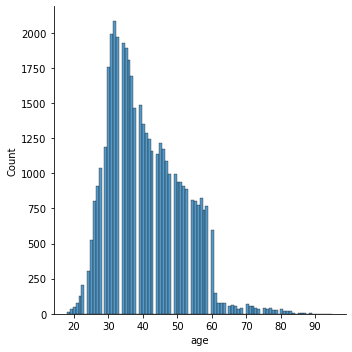

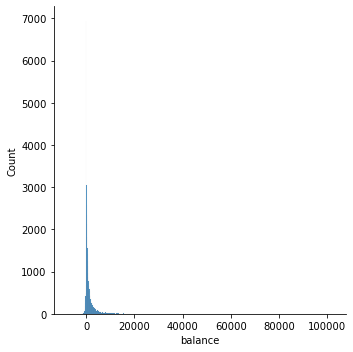

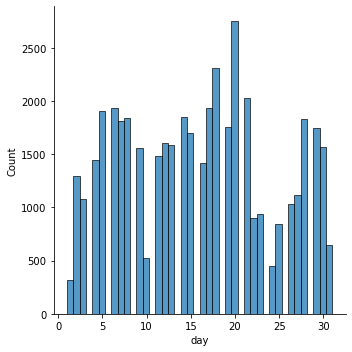

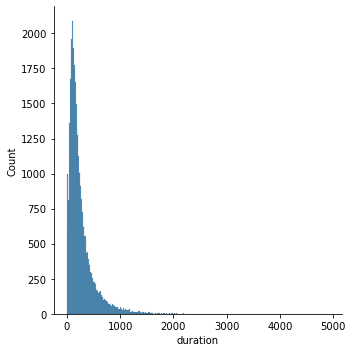

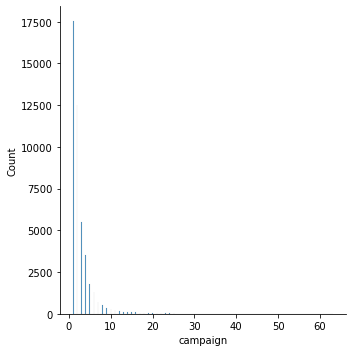

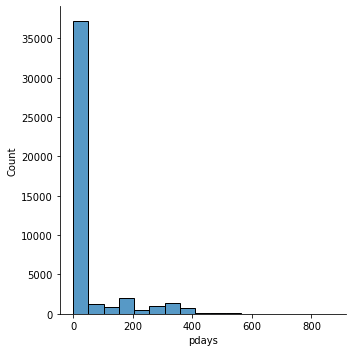

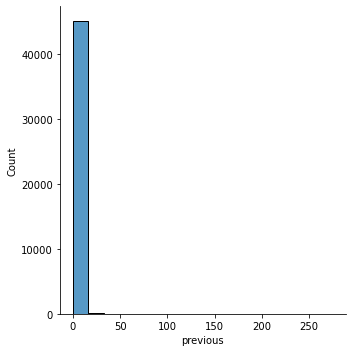

In [99]:
# Probability Distributions

for i in cont_data:
    ax = sns.displot(cont_data[i])
    plt.show()

Some features are strongly skewed to the right, let's focus on those: are _balance_, _campaign_, _pdays_ and _previous_.

Now, let's use boxplots to explore them a bit further.

Note that for the pdays features, -1 means that the client was not previously contacted. Thus, since pdays means the number of days that passed by after the client was last contacted from a previous campaign. I will skip this one in light of time.

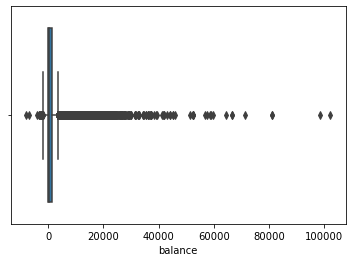

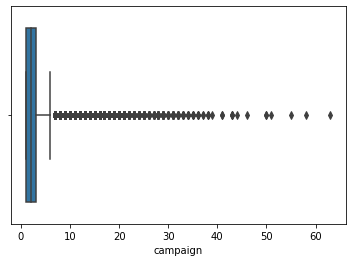

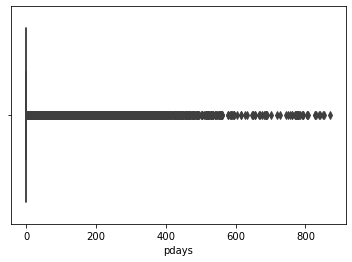

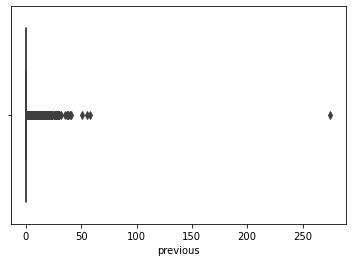

In [104]:
# Boxplots

potential_outliers = ['balance','campaign','pdays','previous']
for i in potential_outliers:
    ax = sns.boxplot(x = cont_data[i], orient = 'h')
    plt.show()

There are clearly some outliers in these features. We need to handle those. For that, let's use the Interquartile Range (IQR) Method.

Notice that because the right skewedness was the basis for outlier detection, I decided to only use the **upper bound** as a threshold when eliminating outliers.

Moreover, instead of dropping observations, I decided to replace them with NaN values (i.e., the default missing value marker on pandas).

**Important Note**: For the _previous_ feature: I decided to first get rid of the max value, which is clearly a strong outlier. Then, I will proceed with the IQR method.

In [107]:
# IQR Method - Treating Outliers

i = 1
for col in potential_outliers:
    Q1 = cont_data[col].quantile(0.25)
    Q3 = cont_data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'column {i}: {cont_data[col].name}\n------------------------')
    print('1st quantile => ',Q1)
    print('3rd quantile => ',Q3)
    print('IQR =>',IQR)

    lower_bound  = Q1-(1.5*IQR)
    print('lower_bound => ' + str(lower_bound))

    upper_bound = Q3+(1.5*IQR)
    print('upper_bound => ' + str(upper_bound))
    print("\n------------------------")
    
    i = i + 1

    #replacing outliers with NaN
    new_data[col][( (new_data[col] < lower_bound) | (new_data[col] > upper_bound) )] = np.nan

# ## campaign 
# Q1_campaign = np.percentile(data['campaign'], 25, interpolation = 'midpoint')
# Q3_campaign = np.percentile(data['campaign'], 75, interpolation = 'midpoint')

# IQR_campaign     = Q3_campaign - Q1_campaign        # compute the IQR
# low_lim_campaign = Q1_campaign - 1.5 * IQR_campaign # lower limit
# up_lim_campaign  = Q3_campaign + 1.5 * IQR_campaign # upper limit

# ## Mark and save outliers in new column
# outlier_mask_campaign = (data['campaign'] > up_lim_campaign)       # only for the upper limit due to the strong right skewness of the data
# data['Outlier_campaign'] = np.where((outlier_mask_campaign), 1, 0) # if out of IQR threshold, then assign value 1, otherwise 0

# ## previous
# ### Cutoff at the max value for the previous feature.
# outlier_max_previous = (data['previous'] == data['previous'].max()) # cutoff at the unexpected max value

# ### iqr
# Q1_previous = np.percentile(data['campaign'], 25, interpolation = 'midpoint')
# Q3_previous = np.percentile(data['campaign'], 75, interpolation = 'midpoint')

# IQR_previous     = Q3_previous - Q1_previous        # compute the IQR
# low_lim_previous = Q1_previous - 1.5 * IQR_previous # lower limit
# up_lim_previous  = Q3_previous + 1.5 * IQR_previous # upper limit

# ### Mark and save outliers in new column
# outlier_mask_previous = (data['previous'] > up_lim_previous)                              # only for the upper limit due to the strong right skewness of the data
# data['Outlier_previous'] = np.where((outlier_max_previous | outlier_mask_previous), 1, 0) # if out of IQR threshold, then assign value 1, otherwise 0

# ## Mark all outliers in new column
# is_outlier_campaign = (data['Outlier_campaign'] == 1)
# is_outlier_previous = (data['Outlier_previous'] == 1)

# data['Outliers'] = np.where((is_outlier_campaign | is_outlier_previous), 1, 0)  # if outlier, then assign value 1, otherwise 0

# ## Count Outliers
# count_outliers_campaign = data['Outlier_campaign'].sum()
# count_outliers_previous = data['Outlier_previous'].sum()
# count_all_outliers      = data['Outliers'].sum()

# print("There are " + str(count_outliers_campaign) + " outliers in the campaign feature.")
# print("There are " + str(count_outliers_previous) + " outliers in the previous feature.")
# print("There are a total of " + str(count_all_outliers) + " outliers.")


column 1: balance
------------------------
1st quantile =>  72.0
3rd quantile =>  1428.0
IQR => 1356.0
lower_bound => -1962.0
upper_bound => 3462.0

------------------------
column 2: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
lower_bound => -2.0
upper_bound => 6.0

------------------------
column 3: pdays
------------------------
1st quantile =>  -1.0
3rd quantile =>  -1.0
IQR => 0.0
lower_bound => -1.0
upper_bound => -1.0

------------------------
column 4: previous
------------------------
1st quantile =>  0.0
3rd quantile =>  0.0
IQR => 0.0
lower_bound => 0.0
upper_bound => 0.0

------------------------


C:\Users\caiov\AppData\Local\Temp/ipykernel_8284/3201319231.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col][( (new_data[col] < lower_bound) | (new_data[col] > upper_bound) )] = np.nan


Note: All outliers are marked in the respective features. We can proceed with trimming.

In [ ]:
# Trimming based on IQR Method

new_data = data[data['Outliers'] == 0] # remove all outliers
print("Old dataset shape: " + str(data.shape[0])     + " observations left and same " + str(data.shape[1])     + " features.")
print("New dataset shape: " + str(new_data.shape[0]) + " observations left and same " + str(new_data.shape[1]) + " features.")
print("All outliers were removed.")

# Drop unecessary columns
data     = data.drop(    columns = ['Outliers', 'Outlier_campaign', 'Outlier_previous'])                                                               # save only data without outliers
new_data = new_data.drop(columns = ['Outliers', 'Outlier_campaign', 'Outlier_previous'])                                                               # save only data without outliers

new_data.describe().T

Note that after we removed the potential outliers, we were left only with people who were not contacted before this campaign (maximum value of _previous_ = 0).
Moreover, since _pdays_ would show number of days that passed by after the client was last contacted from a previous campaign, it makes sense to only be left with the value -1, which indicates people who were not previously contacted.
 
Now let's plot the data again, but for the only relevant feature left: _campaign_.

In [ ]:
# Boxplots & Probability Distribution

plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 1: controls the second plot
sns.distplot(data['campaign'])
plt.xlabel('Campaign - With Outliers')

plt.subplot(2, 2, 2) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 2: controls the first plot
sns.boxplot(x = data['campaign'], orient = 'h')
plt.xlabel('Campaign - With Outliers')

plt.subplot(2, 2, 3) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 3: controls the third plot
sns.distplot(new_data['campaign'])
plt.xlabel('Campaign - After Removing Outliers')

plt.subplot(2, 2, 4) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 4: controls the fourth plot
sns.boxplot(x = new_data['campaign'], orient = 'h')
plt.xlabel('Campaign - After Removing Outliers')

plt.show()

plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 1: controls the second plot
sns.distplot(data['previous'])
plt.xlabel('previous - With Outliers')

plt.subplot(2, 2, 2) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 2: controls the first plot
sns.boxplot(x = data['previous'], orient = 'h')
plt.xlabel('previous - With Outliers')

plt.subplot(2, 2, 3) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 3: controls the third plot
sns.distplot(new_data['previous'])
plt.xlabel('previous - After Removing Outliers')

plt.subplot(2, 2, 4) # 2: both plots on 2 rows / 2: divide both plots into 2 columns / 4: controls the fourth plot
sns.boxplot(x = new_data['previous'], orient = 'h')
plt.xlabel('previous - After Removing Outliers')

plt.show()


Notice that we have a Multimodal Distribution for both the feature campaign and previous.

For the feature _campaign_, the average number of contacts perform during this campaign was 2. Moreover, 75% of the people were contact at most 3 times during this campaign.

For the feature _previous_, the average number of contacts performed before this campaign is roughly 0 because 75% of people have not received any contact before this campaign. However, from the 25% left (10k people), some of them were contacted up to 6 times before this campaign. 

* Summary and Outliers - Categorical Variables

In [ ]:
# Category Distribution (Relative Frequency Distribution)